In [7]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D,Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from tqdm import tqdm
import numpy as np

In [2]:
path="D://datasets//IIIT_D//train";
fol=os.listdir(path)

In [44]:
X,y=list(),list();
size=len(fol);
bag={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',
    18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',
    35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',46:'k',47:'l',48:'m',
     49:'n',50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',61:'z'};
def one_hot(val,size):
    a=np.array([0]*size);
    a[val]=1;
    return a;

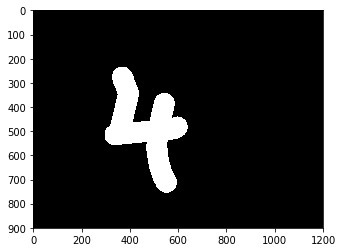

In [65]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample005//img005-001.png",cv2.IMREAD_GRAYSCALE)/255
img1=np.reshape((cv2.resize(img,(50,50))),(50,50,1))
plt.imshow(img,cmap=plt.cm.binary)

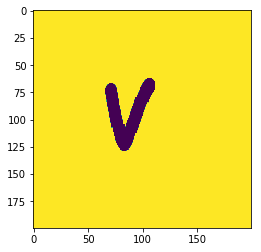

In [94]:
plt.imshow(img1[0])

In [45]:
for val,i in tqdm(enumerate(fol)):
    path_n=os.path.join(path,i);
    for img_n in os.listdir(path_n):
        img=cv2.imread(os.path.join(path_n,img_n),cv2.IMREAD_GRAYSCALE)/255
        X.append((np.reshape(cv2.resize(img,(50,50)),(50,50,1))))
        y.append(one_hot(val,size))

62it [00:30,  2.09it/s]


In [46]:
X[100][0]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15, random_state=42)
X_train_arr=np.array(X_train)
X_val_arr=np.array(X_val)
y_train_arr=np.array(y_train)
y_val_arr=np.array(y_val)
_,h,w,d=X_train_arr.shape

In [24]:
X_train_arr_new=np.reshape(X_train_arr,(1860,50,50))

In [48]:
model = Sequential()
model.add(Conv2D(248, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(62, kernel_size=3, activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62, activation='softmax'))
model.summary()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(248, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(62, kernel_size=3, activation="relu", padding="same")`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 50, 50, 248)       6448      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 248)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 62)        138446    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 62)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8928)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 62)                553598    
Total params: 698,492
Trainable params: 698,492
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x=X_train_arr,y=y_train_arr,epochs=10,validation_data=(X_val_arr,y_val_arr))
print(history.history)

Train on 2108 samples, validate on 372 samples
Epoch 1/10
2108/2108 [==============================] - ETA: 1:00 - loss: 4.1432 - acc: 0.0000e+0 - ETA: 20s - loss: 4.1829 - acc: 0.0104    - ETA: 13s - loss: 4.1654 - acc: 0.01 - ETA: 9s - loss: 4.1555 - acc: 0.0179 - ETA: 7s - loss: 4.1515 - acc: 0.017 - ETA: 6s - loss: 4.1489 - acc: 0.014 - ETA: 5s - loss: 4.1448 - acc: 0.012 - ETA: 4s - loss: 4.1434 - acc: 0.010 - ETA: 4s - loss: 4.1399 - acc: 0.014 - ETA: 3s - loss: 4.1387 - acc: 0.018 - ETA: 3s - loss: 4.1365 - acc: 0.019 - ETA: 3s - loss: 4.1338 - acc: 0.021 - ETA: 2s - loss: 4.1333 - acc: 0.021 - ETA: 2s - loss: 4.1324 - acc: 0.019 - ETA: 2s - loss: 4.1308 - acc: 0.022 - ETA: 2s - loss: 4.1290 - acc: 0.024 - ETA: 1s - loss: 4.1278 - acc: 0.022 - ETA: 1s - loss: 4.1254 - acc: 0.025 - ETA: 1s - loss: 4.1217 - acc: 0.028 - ETA: 1s - loss: 4.1177 - acc: 0.028 - ETA: 1s - loss: 4.1120 - acc: 0.029 - ETA: 1s - loss: 4.1074 - acc: 0.028 - ETA: 1s - loss: 4.1064 - acc: 0.027 - ETA: 0s - l

2108/2108 [==============================] - ETA: 2s - loss: 0.6978 - acc: 0.843 - ETA: 1s - loss: 0.6456 - acc: 0.833 - ETA: 1s - loss: 0.7727 - acc: 0.800 - ETA: 1s - loss: 0.8242 - acc: 0.785 - ETA: 1s - loss: 0.7793 - acc: 0.784 - ETA: 1s - loss: 0.8369 - acc: 0.767 - ETA: 1s - loss: 0.8323 - acc: 0.776 - ETA: 1s - loss: 0.8097 - acc: 0.783 - ETA: 1s - loss: 0.8220 - acc: 0.788 - ETA: 1s - loss: 0.8256 - acc: 0.778 - ETA: 1s - loss: 0.8371 - acc: 0.769 - ETA: 1s - loss: 0.8618 - acc: 0.764 - ETA: 1s - loss: 0.8372 - acc: 0.772 - ETA: 1s - loss: 0.8354 - acc: 0.770 - ETA: 1s - loss: 0.8407 - acc: 0.772 - ETA: 1s - loss: 0.8265 - acc: 0.775 - ETA: 1s - loss: 0.8267 - acc: 0.775 - ETA: 0s - loss: 0.8361 - acc: 0.770 - ETA: 0s - loss: 0.8309 - acc: 0.772 - ETA: 0s - loss: 0.8414 - acc: 0.766 - ETA: 0s - loss: 0.8477 - acc: 0.767 - ETA: 0s - loss: 0.8491 - acc: 0.766 - ETA: 0s - loss: 0.8562 - acc: 0.764 - ETA: 0s - loss: 0.8716 - acc: 0.760 - ETA: 0s - loss: 0.8664 - acc: 0.760 - ETA: 

In [66]:
predict=model.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(bag[val],"with accuracy of",acc)

4 with accuracy of 0.97220796
